### Building a deep neural network. Application on image classification task

This notebook aims to train a manually built deep neural network using the Gradient Descent algorithm. Forward and backpropagation steps have been defined in `dll_gradient_descent.py` file. 


The training dataset is borrowed from one of the programming assignments of the [Deep Learning Coursera Specialization](https://www.coursera.org/learn/neural-networks-deep-learning?specialization=deep-learning). It is used for cat/non-cat classification. It is a small dataset containing 209 training images and 50 testing images (64x64)


Below you'll find the implementation of a 4 layer model with ReLU activation functions in the first 3 layers and sigmoid activation function for the output layer (since the problem requires binary classification). 
I built it just to test and strengthen my understanding of the Gradient Descent algorithm steps.

In [1]:
import h5py

from dll_gradient_descent import *


In [2]:
def load_data():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) 

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) 
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) 

    classes = np.array(test_dataset["list_classes"][:])
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

In [4]:
print("Train dataset shape:", train_x_orig.shape) 
print("Test dataset shape:", test_x_orig.shape) 

Train dataset shape: (209, 64, 64, 3)
Test dataset shape: (50, 64, 64, 3)


In [5]:
# reshape 3D images vectors to 1D
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T 
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print("Reshaped train dataset shape:", train_x.shape) # 12288 = 64*64*3
print("Reshaped test dataset shape:", test_x.shape) 


Reshaped train dataset shape: (12288, 209)
Reshaped test dataset shape: (12288, 50)


In [6]:
def train_and_evaluate_model(X, Y, layer_dimensions, alfa, no_iterations):
        
    params = param_initialization(layer_dimensions)
    
    L = len(layer_dimensions)
    costs = []
    iterations = []
    
    for i in range(no_iterations):
        
        AL, forward_outputs = forward_propagation_multiple_steps(X, params)
        cost = compute_cost(AL, Y)
        
        grads = backward_propagation_multiple_steps(Y, AL, forward_outputs)
        params = update_params(params, grads, alfa)
        
        if i%100 == 0:
            costs.append(cost)
            iterations.append(i)
            print(i, cost)
        
    plt.plot(iterations, np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations')
    plt.show()
            
    return params


0 0.6988045409383135
100 0.6790579615942149
200 0.666998156872308
300 0.6563720108603354
400 0.6441325707311418
500 0.6293371458065296
600 0.6073705805730965
700 0.5780756220780355
800 0.5443894699558137
900 0.5090561723407252
1000 0.4738001817763767
1100 0.42475321844543645
1200 0.4059913976551849
1300 0.36495506679131134
1400 0.3371542145619768
1500 0.2988974027504527
1600 0.25397381322719764
1700 0.21230195644811836
1800 0.18960317058397397
1900 0.16493214939364756


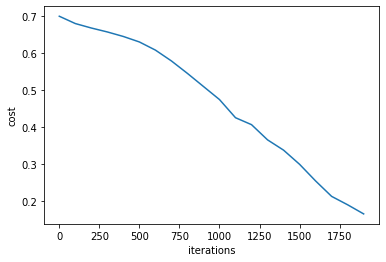

In [8]:
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model
params = train_and_evaluate_model(train_x, train_y, layers_dims, 0.005, 2000)

In [9]:
print("On test dataset: ")
pred_test = predict(test_x, test_y, params)

print("\nOn training dataset: ")
pred_train = predict(train_x, train_y, params)

On test dataset: 
Accuracy = 0.82

On training dataset: 
Accuracy = 0.9521531100478469


Of course, the model overfits to the training set. 209 is a very small for this computer vision task. A bigger training size is required and implementing regularization techniques should help.

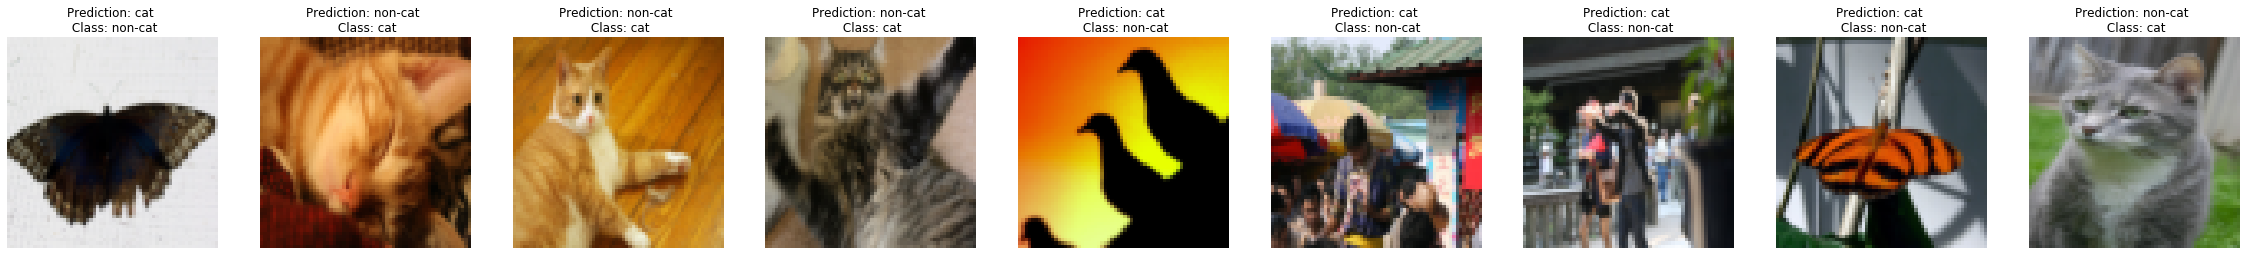

In [10]:
print_mislabeled_images(classes, test_x, test_y, pred_test)

Misclassification occurs because:
- the cat appeasr on backgrounds of similar color
- unusual camera angle
- cat in unusual position
- picture brightness
- scaling variation